# Lab 3: Clustering

###### Made by Damien Chambon and Joao Gabriel Lopes de Oliveira

The goal of this lab session is to code a clustering algorithm, apply it to data and compare the performance with other techniques.

You have to send the filled notebook named **"L2_familyname1_familyname2.ipynb"** (groups of 2) by email to *lucca.guardiola@centralesupelec.com* by October 29, 2020. Please put **"AML-L3"** in the subject. 

We begin with the standard imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

plt.style.use('ggplot')

# I - Implementation of the different clustering algorithms

We will have two toy datasets to try the different methods in order to find the most coherent groups of point for each toy dataset.

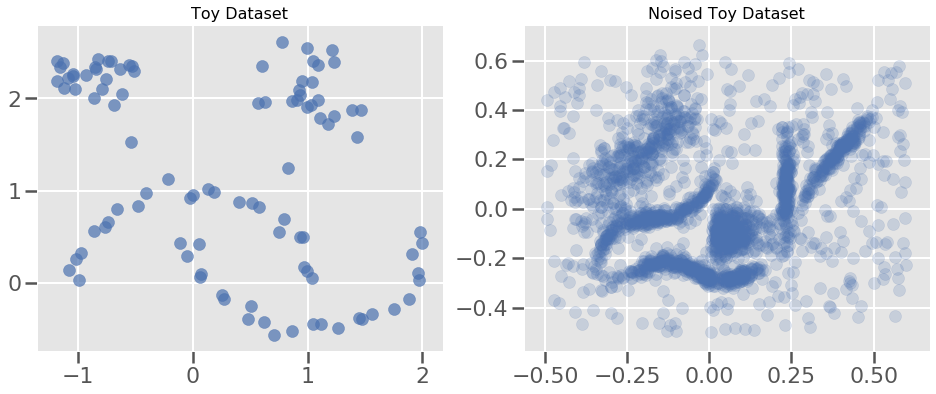

In [2]:
import sklearn.datasets as data
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data_0 = np.vstack([moons, blobs])

test_data_1 = np.load('clusterable_data.npy')

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c='b', alpha=0.7)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], color='b', alpha=0.2)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show();

## I-1 K-means

K-Means is the 'go-to' clustering algorithm for many simply because it is fast, easy to understand, and available everywhere (there's an implementation in almost any statistical or machine learning tool you care to use). However, K-Means has a few problems caused by its simplicity. 

We try the `sklearn` implementation in our toy datasets:

### Task : Train two kmeans models for datasets test_data_0 and test_data_1 with an arbitrary number of clusters then return clustering labels for datasets test_data_0 and test_data_1.

In [3]:
from sklearn.cluster import KMeans

"""
The output should be : 
kmeans_0_labels : list of labels for test_data_0
kmeans_1_labels : list of labels for test_data_1
"""
#TODO
# We try with 3 clusters for the Toy dataset and 4 clusters for the Noised Toy dataset
kmeans_0 = KMeans(n_clusters=3, random_state=0)
kmeans_0.fit(test_data_0)
kmeans_0_labels = kmeans_0.labels_

kmeans_1 = KMeans(n_clusters=4, random_state=0)
kmeans_1.fit(test_data_1)
kmeans_1_labels = kmeans_1.labels_

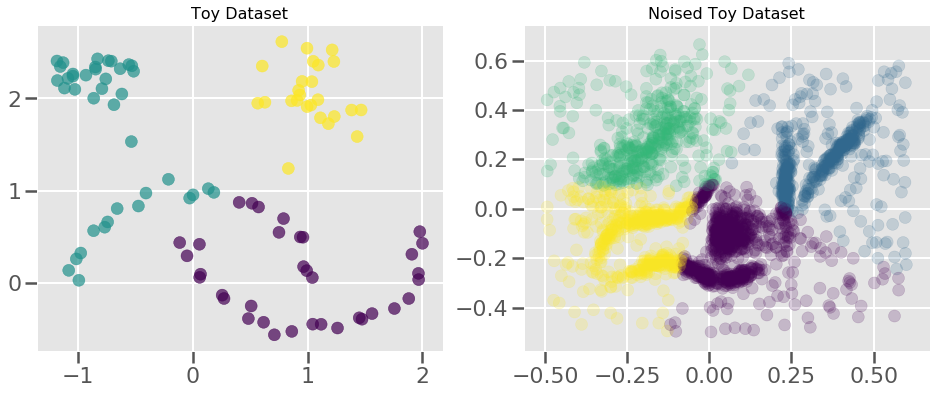

In [4]:
## Plot the results of the clustering - Run this code

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c=kmeans_0_labels , alpha=0.7)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c=kmeans_1_labels, alpha=0.2)
ax[1].set_title('Noised Toy Dataset', size=16)
plt.show()

**We can see that the K-Means algorithm struggles to differentiate the 2 apparent clusters**
**at the bottom of the left graph.**

## I-2 How do we choose the number of clusters in kmeans ? 
-By knowing in advance the number of clusters you want to create. For instance you want to divide the clients of an investment bank in three groups depicting the clients' willingness to take risks : low-risk investments clients - average risk-investments clients - high-risk investments client

-By plotting the data. Need a 2D/3D data => could be achieved by dimensionnality reduction methods like PCA or t-SNE etc...

-With metrics (Elbow method, davies-bouldin index, silhouette score)

### The elbow method :

The elbow method is often use to choose the number of cluster K. It consists in computing for several K the inertia $I_K$ induced by the clustering. Then choose $K^*$ sush as $K^* = argmax \frac{d^2}{dK^2} I_K$. It means that $K^*$ is the cutoff point where the decreasing of the inertia is going from sharp to slow.


### Question 
Find the expression of the Inertia for clustering. What could be its interpretation in terms of Variance ? 

Answer : The inertia is equal to the sum of the squared distances between each point and the centroid of its corresponding cluster: $J_i = \sum_{x\in C_i} \mathcal{D}^2(x,m_i)$. We can view the centroid of the cluster as a mean, and the distance between a point and the centroid of its cluster as a difference. Since we sum the squared distances, the inertia can be represented as the total variance between the points and the centroid of their cluster.

### Question 
What could be the reason for choosing $K^*$ like that ?

Answer : We want to select K based on the tradeoff inertia-number of clusters. We want to minimize inertia while having not too many clusters to be able to detect patterns in the data. 

As you increase the number of clusters, each increment in K leads to diminishing returns in the reduction of inertia. Thus, you want the highest number, $K^*$ of clusters that gives a considerable contribution to reduce inertia. All additional clusters after that highest number will bring little reduction in inertia so there is no point in adding them.

### Task : Fill the plot_inertia fonction 

In [5]:
def plot_inertia(k_min,k_max,data):
    """ Fit several kmeans models with different K in order to find visually the optimal K with the elbow method 

    Output : 
    plot the inertia as a function of the number of clusters
    """
    inertia = []
    for k in range(k_min,k_max):
        # for each k, we compute the inertia and append it to the list of inertias
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        
    plt.plot([k for k in range(k_min,k_max)],inertia, color="b")

### Task : Using the plot_inertia function and the elbow method, find visually $K^*$ for test_data_0 and test_data_1 ; then plot your clusterings with the scatterplot

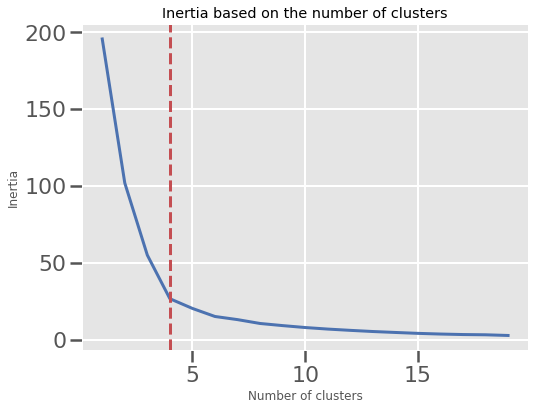

In [6]:
#TODO
plt.figure(figsize=(8, 6))
plot_inertia(1,20,test_data_0)
plt.axvline(x=4,color='r',linestyle="--") # adding a red line to show where the elbow is located
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia based on the number of clusters')
plt.show()

**The elbow curve shows that the appropriate number of clusters is 4.**

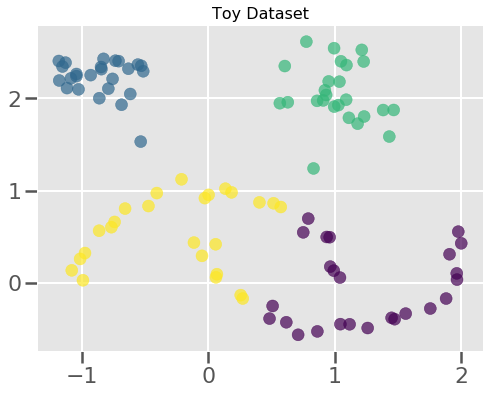

In [7]:
#ideal number of clusters is 4
k = 4
kmeans_0 = KMeans(n_clusters=k, random_state=0)
kmeans_0.fit(test_data_0)
kmeans_0_labels = kmeans_0.labels_
plt.figure(figsize=(8, 6))
plt.scatter(test_data_0.T[0], test_data_0.T[1], c=kmeans_0_labels , alpha=0.7)
plt.title('Toy Dataset', size=16)
plt.show()

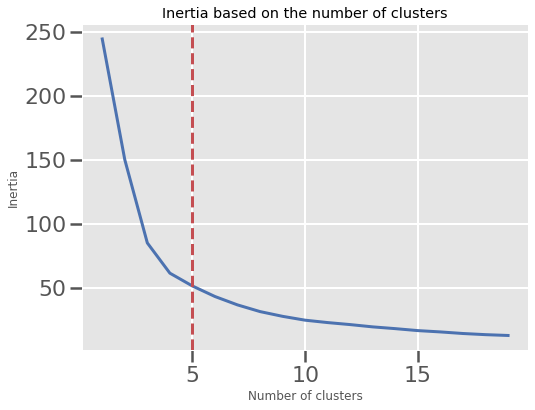

In [8]:
plt.figure(figsize=(8, 6))
plot_inertia(1,20,test_data_1)
plt.axvline(x=5,color='r',linestyle="--") # adding a red line to show where the elbow is located
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia based on the number of clusters')
plt.show()

The elbow curve shows that the appropriate number of clusters is 5.

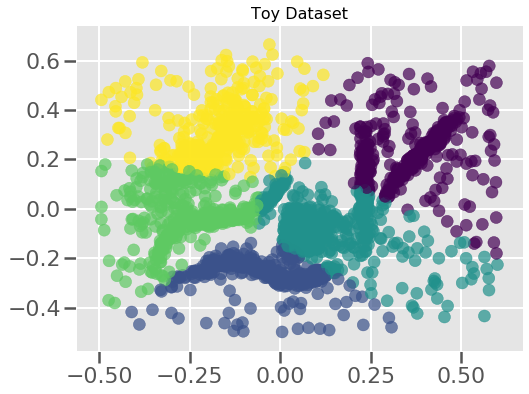

In [9]:
#ideal number of clusters is 5
k = 5
kmeans_1 = KMeans(n_clusters=k, random_state=0)
kmeans_1.fit(test_data_1)
kmeans_1_labels = kmeans_1.labels_
plt.figure(figsize=(8, 6))
plt.scatter(test_data_1.T[0], test_data_1.T[1], c=kmeans_1_labels , alpha=0.7)
plt.title('Toy Dataset', size=16)
plt.show()

## I-3 Aglomerative Single Linkage clustering

Agglomerative clustering is a suite of algorithms all based on the same idea. The fundamental idea is that you start with each point in it's own cluster and then, for each cluster, use some criterion to choose another cluster to merge with. Do this repeatedly until you have only one cluster and you get get a hierarchy, or binary tree, of clusters branching down to the last layer which has a leaf for each point in the dataset. The most basic version of this, single linkage, chooses the closest cluster to merge, and hence the tree can be ranked by distance as to when clusters merged/split.



### Task  : use the cluster.AgglomerativeClustering function of sklearn for dataset test_data_0 and test_data_1 with a single linkage and with the number of cluster of your choice

In [10]:
# TODO
# 2 agglomerative clustering models with a single linkage
from sklearn.cluster import AgglomerativeClustering
linkage_0 = AgglomerativeClustering(n_clusters=3,linkage='single')
linkage_0.fit(test_data_0)

linkage_1 = AgglomerativeClustering(n_clusters=3,linkage='single')
linkage_1.fit(test_data_1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3,
                        pooling_func='deprecated')

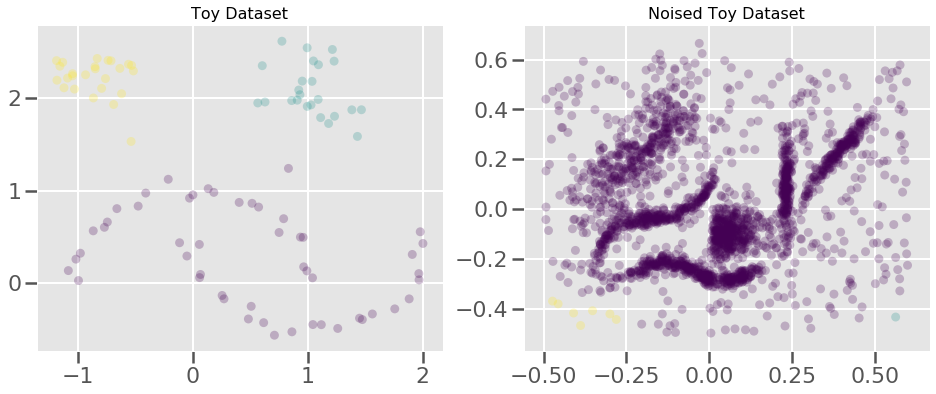

In [11]:
### Plot your results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c = linkage_0.labels_, **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c = linkage_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show()

### Question : Comment the results :

On the toy dataset, the results look better than with K-Means for the non-convex shape of the 2 elements at the bottom of the graph. They were grouped together and it is reasonable given their separation from the rest of the observations. However, the two clusters are the top are now considered to be the same cluster, even though they appear to be distant. On top of that, one observation is by itself in its own cluster. 

On the noised toy dataset, the noise completely misled the algorithm: it considers all the data to be in the same cluster. Because we set the number of clusters to be equal to 3, it tried to find some clusters in the noise while their presence is not justifiable.

### Task : Now use the cluster.AgglomerativeClustering function for dataset test_data_0 and test_data_1 with a WARD linkage, and with the number of clusters of your choice. Then plot the results

In [12]:
#TODO
# 2 agglomerative clustering models with a Ward linkage
linkage_0 = AgglomerativeClustering(n_clusters=3,linkage='ward')
linkage_0.fit(test_data_0)

linkage_1 = AgglomerativeClustering(n_clusters=3,linkage='ward')
linkage_1.fit(test_data_1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

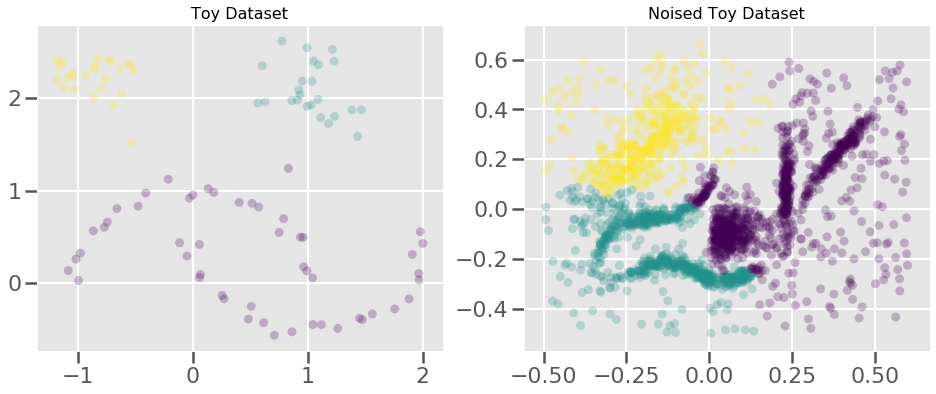

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c = linkage_0.labels_, **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c = linkage_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show()

### Question : Give a possible explanation of why ward linkage performs better than single linkage

Ward linkage seems to perform better than single linkage. Indeed, in the two datasets, the different clusters are appropriately delineated. Ward performs better because its goal is to minimize the variance of the different clusters that are merged. Thus, each merging decision takes into account the resulting cluster. By having clusters with the smallest variance possible, they are more logical when we look at the data.

On the other hand, the single linkage just merges observations that are close together without looking at the resulting variance. Thus, the merged clusters may have a very high resulting variance in the end and thus being very spread out.

## I-4 DBSCAN

DBSCAN is a density based algorithm -- it assumes clusters for dense regions. It is also the first actual clustering algorithm we've looked at: it doesn't require that every point be assigned to a cluster and hence doesn't partition the data, but instead extracts the 'dense' clusters and leaves sparse background classified as 'noise'. In practice DBSCAN is related to agglomerative clustering. As a first step DBSCAN transforms the space according to the density of the data: points in dense regions are left alone, while points in sparse regions are moved further away. Applying single linkage clustering to the transformed space results in a dendrogram, which we cut according to a distance parameter (called epsilon or `eps` in many implementations) to get clusters. Importantly any singleton clusters at that cut level are deemed to be 'noise' and left unclustered. 

### Apply it to the test_data, how do you tune the parameters?

In [14]:
# Finding the appropriate epsilon
# We loop through the points and we find the mean distance with their K Nearest neighbors
# We arbitrarily choose K = 5
from sklearn.neighbors import NearestNeighbors
import numpy as np
neigh_0 = NearestNeighbors(n_neighbors=5)
neigh_0.fit(test_data_0)

# getting the distances between each point and its 5 closest neighbors
distances = neigh_0.kneighbors(X=test_data_0, n_neighbors=5, return_distance=True)[0]
mean_distances = []
for distance in distances:
    # We compute the mean of the distances for each point in the dataset
    mean_distances.append(np.mean(distance))

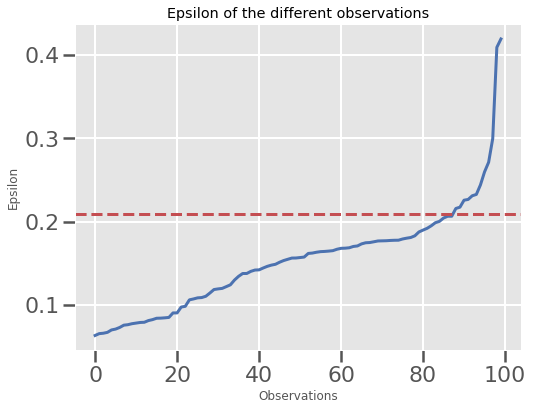

In [15]:
mean_distances.sort() #We sort them in ascending order and we plot them
plt.figure(figsize=(8, 6))
plt.plot(mean_distances, color='b')
plt.axhline(y=0.21,color='r',linestyle="--")
plt.xlabel('Observations')
plt.ylabel('Epsilon')
plt.title('Epsilon of the different observations')
plt.show()
#our choice of epsilon is at 0.21 because that is where the elbow takes place

In [16]:
from sklearn.cluster import DBSCAN
dbscan_0 = DBSCAN(eps=0.21, min_samples=5)
dbscan_0.fit(test_data_0)

DBSCAN(algorithm='auto', eps=0.21, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

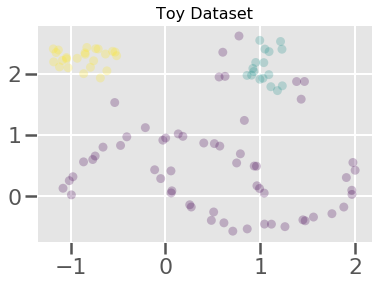

In [17]:
plt.scatter(test_data_0.T[0], test_data_0.T[1], c = dbscan_0.labels_, **plot_kwds)
plt.title('Toy Dataset', size=16)

plt.show()

**The results are not as good as we expect, despite choosig the epsilon where the elbow takes place.**

In [18]:
neigh_1 = NearestNeighbors(n_neighbors=5)
neigh_1.fit(test_data_1)

# getting the distances between each point and its 5 closest neighbors
distances = neigh_1.kneighbors(X=test_data_1, n_neighbors=5, return_distance=True)[0]
mean_distances = []
for distance in distances:
    # We compute the mean of the distances
    mean_distances.append(np.mean(distance))

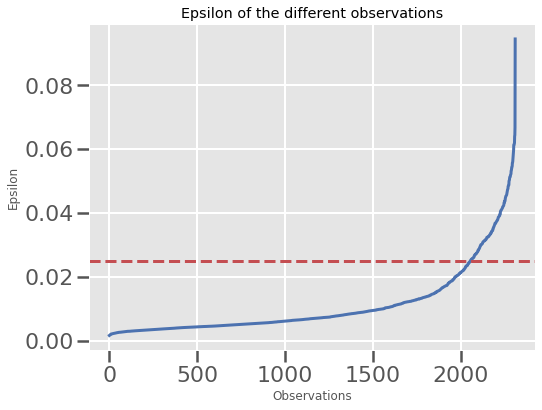

In [19]:
mean_distances.sort() #We sort them in ascending order and we plot them
plt.figure(figsize=(8, 6))
plt.plot(mean_distances, color ='b')
plt.axhline(y=0.025,color='r',linestyle="--")
plt.xlabel('Observations')
plt.ylabel('Epsilon')
plt.title('Epsilon of the different observations')
plt.show()
#our choice of epsilon is at 0.025 because that is where the elbow takes place

In [20]:
dbscan_1 = DBSCAN(eps=0.025, min_samples=5)
dbscan_1.fit(test_data_1)

DBSCAN(algorithm='auto', eps=0.025, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

Text(0.5, 1.0, 'Noised Toy Dataset')

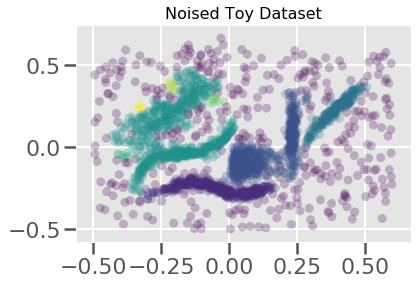

In [21]:
plt.scatter(test_data_1.T[0], test_data_1.T[1], c = dbscan_1.labels_, **plot_kwds)
plt.title('Noised Toy Dataset', size=16)

**The results look much better now because the dense areas were correctly isolated from the noise of the data.**

**There are still some observations that are in their own clusters, probably showing that our choice of epsilon is could be better.**

# II Apply the algorithms to the following images and comment the results

## You have to choose between exercice II-1 NASA Curiosity Picture or II-2 Color compression !!!!!!!!!!!!!!!!!!!!!

## II-1 NASA Curiosity Picture

- Look at following NASA photo taken by a robot in mars:


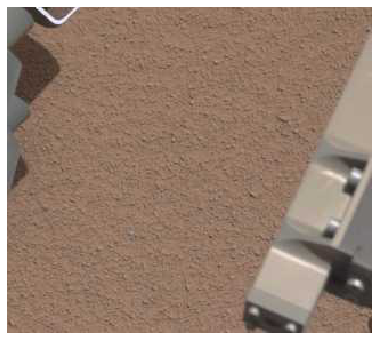

In [22]:
from PIL import Image
import numpy as np

Im_1  = Image.open('im_nasa_reduced.jpg')

fig = plt.figure(figsize=(8, 6))
plt.imshow(Im_1)
plt.axis('off')
plt.show()
Im_matrix = np.array(Im_1)/255.0

Transform the image to an intensity (I) and saturation (S) representation, it helps to distinguish bright and textures.
For each pixel i we should have : 
$$I_i=\frac{R_i+G_i+B_i}{3}$$
$$S_i=1-I_i\times min(R_i, G_i, B_i)$$

### TASK : You have to create a matrix $IS$ of size $91520\times2$ such as $IS=\{I_i,S_i\}_{1\le i\le91520}$ 

tips: you can use the method $\texttt{.reshape}$ on a np.array() to give the array the size you want

In [23]:
#TODO 
Im_array = np.reshape(Im_matrix, (Im_matrix.shape[0]*Im_matrix.shape[1], 3))

def transform_matrix(rgb):
    intensity = sum(rgb)/3
    saturation = 1 - intensity * min(rgb)
    return [intensity, saturation]

Im_IS = list(map(transform_matrix, Im_array))

### TASK : Apply one clustering algorithm of your choice on dataset IS to segment the image i.e find pixels representing the robot, mars surface etc... 


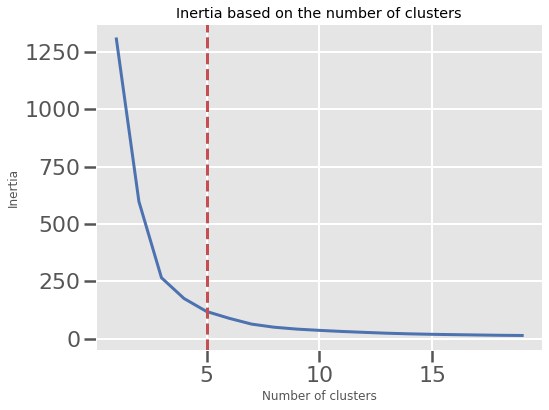

In [24]:
plt.figure(figsize=(8, 6))
plot_inertia(1, 20, Im_IS) #we use K-means here
plt.axvline(x=5,color='r',linestyle="--") # adding a red line to show where the elbow is located
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia based on the number of clusters')
plt.show()
# the appropriate number of clusters is 5

### TASK : Then Plot the segmented image and comment the results and check if you find something on mars' surface.


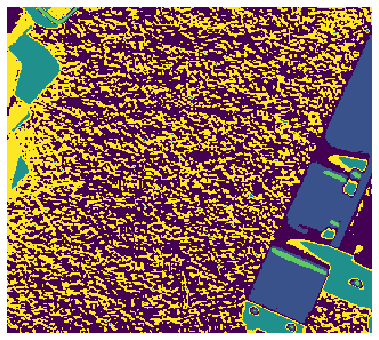

In [25]:
kmeans = KMeans(n_clusters=5).fit(Im_IS) #we fit a k-means model with the number of clusters = 5 to our data

#we reshape the labels to have them fit our initial image size
reshaped_labels = np.reshape(kmeans.labels_, (Im_matrix.shape[0], Im_matrix.shape[1]))

reshaped_labels.shape

##plot new_colors
fig = plt.figure(figsize=(8, 6))
plt.imshow(reshaped_labels) #new colors must be an array of size 286x320
plt.axis('off')
plt.show()

**We can see that the model has been able to differentiate the different elements of the picture. For instance, we can more clearly identify individual rocks. Indeed, the difference in lighting reflected on the surface which would be invisible to the naked eye is easily detected by the model. Therefore, more information about the surface can be extracted from the image compared to directly looking at the photo.**